# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, "html.parser")


In [ ]:
# Extract all rows of data, cleared cell output bc html was too long.
table = soup.find_all("tbody")
table

### Step 3: Store the Data
* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
table_data = []

# Loop through the scraped data to create a list of rows
row_values = []
for row in soup.find_all('tr',class_="data-row"):
    td_tags = row.find_all('td')
    td_val = [y.text for y in td_tags]
    row_values.append(td_val)

#just checking the first entry
row_values[0]

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']

In [7]:
#Extracting all the row headers and adding to a list to make a df later
row_headers = []
for row in soup.find_all("tbody"):
    for header in row.find_all('th'):
        row_headers.append(header.text)
row_headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
browser.quit()

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(row_values,columns=row_headers)

In [10]:
# Confirm DataFrame was created successfully
df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

In [11]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
df = df.astype({'id':'int',
                'sol':'int',
                'ls':'int',
                'month':'int',
                'min_temp':'float',
                'pressure':'float'})

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [37]:
#Checking the data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [14]:
#previewing data
df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

In [28]:
# 1. How many months are there on Mars?
months_on_mars = df['sol'].groupby(df['month']).count()
months_on_mars

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: sol, dtype: int64

In [16]:
# 2. How many Martian days' worth of data are there?
martian_days = df['sol'].count()
print(f"There are {martian_days} martian days of data.")

There are 1867 martian days of data.


In [17]:
# 3. What is the average low temperature by month?
avg_low = df['min_temp'].groupby(df['month']).mean().round(3)
avg_low


month
1    -77.161
2    -79.933
3    -83.307
4    -82.747
5    -79.309
6    -75.299
7    -72.282
8    -68.383
9    -69.172
10   -71.982
11   -71.986
12   -74.452
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'Average Temperature by Martian Months on Mars')

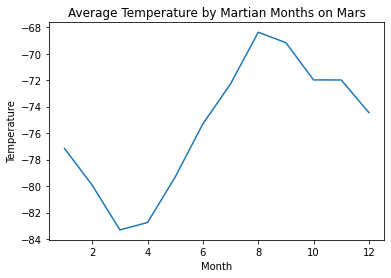

In [18]:
# Plot the average temperature by month
plt.plot(avg_low)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Average Temperature by Martian Months on Mars')

In [19]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_low.idxmin()
hottest_month = avg_low.idxmax()

print(f"Coldest Month: {coldest_month} \nHottest Month: {hottest_month}")

Coldest Month: 3 
Hottest Month: 8


In [20]:
# 4. Average pressure by Martian month
avg_pressure = df['pressure'].groupby(df['month']).mean().round(3)
avg_pressure

month
1     862.489
2     889.455
3     877.323
4     806.330
5     748.557
6     745.054
7     795.106
8     873.830
9     913.306
10    887.312
11    857.014
12    842.157
Name: pressure, dtype: float64

Text(0.5, 1.0, 'Average Pressure by Martian Month on Mars')

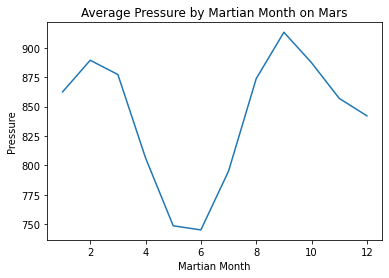

In [29]:
# Plot the average pressure by month
plt.plot(avg_pressure)
plt.xlabel('Martian Month')
plt.ylabel('Pressure')
plt.title('Average Pressure by Martian Month on Mars')

Text(0.5, 1.0, 'Terrestrial Years vs. Mars Solar Longitude')

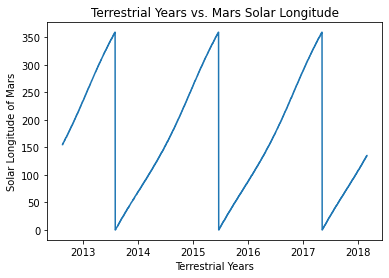

In [34]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df['terrestrial_date'],df['ls'])
plt.xlabel('Terrestrial Years')
plt.ylabel('Solar Longitude of Mars')
plt.title('Terrestrial Years vs. Mars Solar Longitude')

In [44]:
#ls = 0 at 2013-08-01, 2015-06-18
#this df is all entries from one mars rotation around the sun
one_mars_year_df = df[(df['terrestrial_date']>= '2013-08-01') & (df['terrestrial_date'] <= '2015-06-18')]

#counting the number of data points in one mars rotation
mars_days = one_mars_year_df['id'].count()
print(f'There are approximately {mars_days} terrestrial days in one Martian Year.')

There are approximately 621 terrestrial days in one Martian Year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

In [23]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv')